# 05 - Structural features

## Summary

We have around 5k structures. It would be good if we were able to find some phylogenetic or clade specific traits in their structures that are not absolutely trivial. We analyze a set of structural features as computed by one of our pipeline files.

## Loading modules and file

In [97]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import numpy as np


In [98]:
palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}

In [99]:
structural_features = pd.read_json('../structures/structure-features.csv')
reference = pd.read_csv('../structures/reference.csv')
structural_features = pd.merge(reference, structural_features, on='id')

In [100]:
structural_features['original_name'] = structural_features['original_name'].apply(lambda x: x.split('_001.')[0].replace('_map', ''))

In [101]:
structural_features.columns

Index(['original_name', 'id', 'stochiometry', 'average_pLDDT', 'taxond_id',
       'lineage', 'scientific_name', 'is_ancestral', 'nitrogenase_type',
       'status', 'chain_reference', 'variant', 'clade', 'total_area',
       'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree'],
      dtype='object')

In [102]:
structural_features.query('stochiometry == "DDKK"').query('status == "gold"').to_csv('../data/dump_data/ddkk.structural-features.csv', sep='\t')

In [7]:
structural_features.query('stochiometry == "HH"').query('status == "gold"').to_csv('../data/dump_data/hh.structural-features.csv', sep='\t')

In [8]:
pd.read_csv('../data/dump_data/hh.structural-features.csv', sep='\t')

,Unnamed: 0,original_name,id,stochiometry,average_pLDDT,taxond_id,lineage,scientific_name,is_ancestral,nitrogenase_type,...,eig0,eig1,eig2,eig3,eig4,rad,avg_shortest_path,avg_clustering,avg_density,avg_degree
0,769,Anc_1392,nsdb-000770,HH,88.477355,Anc_1392_map,Anc_1392_map,Anc_1392_map,True,Anc,...,0.441200,1.106340,1.271023,1.674894,1.773668,22.176699,8.410793,0.081674,0.007356,3.567901
1,770,Nif_Alkaliflexus_imshenetskii,nsdb-000771,HH,89.205821,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,...,0.430711,1.110448,1.279848,1.655656,1.797235,22.246964,8.491256,0.072968,0.007147,3.559118
2,771,Anc_1414,nsdb-000772,HH,88.368504,Anc_1414_map,Anc_1414_map,Anc_1414_map,True,Anc,...,0.475073,1.129459,1.276698,1.758332,1.817596,22.136958,8.502837,0.081716,0.007301,3.599190
3,772,Anc_1242,nsdb-000773,HH,86.199069,Anc_1242_map,Anc_1242_map,Anc_1242_map,True,Anc,...,0.266875,1.059891,1.136145,1.503099,1.679453,22.809185,6.295885,0.096540,0.014854,3.624490
4,773,Anc_1339,nsdb-000774,HH,88.427352,Anc_1339_map,Anc_1339_map,Anc_1339_map,True,Anc,...,0.359371,1.000096,1.165527,1.397761,1.406816,23.311826,11.380372,0.093909,0.006917,3.562016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,1533,Anc_1386,nsdb-001534,HH,87.865967,Anc_1386_map,Anc_1386_map,Anc_1386_map,True,Anc,...,0.462735,1.128534,1.277265,1.764845,1.842807,22.108249,8.376104,0.081298,0.007242,3.620758
765,1534,Nif_Pantoea_cypripedii,nsdb-001535,HH,89.844539,55209,Bacteria; Pseudomonadota; Gammaproteobacteria;...,Pantoea cypripedii,False,Nif,...,0.351615,0.975285,1.141774,1.245267,1.317238,23.701522,9.998742,0.075332,0.006678,3.579143
766,1535,Nif_Tolumonas_lignilytica,nsdb-001536,HH,88.912279,1283284,Bacteria; Pseudomonadota; Gammaproteobacteria;...,Tolumonas lignilytica,False,Nif,...,0.339546,0.965096,1.116473,1.227374,1.297252,23.744948,6.551341,0.099627,0.014016,3.714286
767,1536,Nif_Proteobacteria_bacterium_CG1_02_64_396,nsdb-001537,HH,89.376597,NaN,NaN,Proteobacteria bacterium CG1 02 64 396,False,Nif,...,0.376352,1.021248,1.203401,1.396425,1.438401,23.303803,6.454797,0.094493,0.013989,3.623077


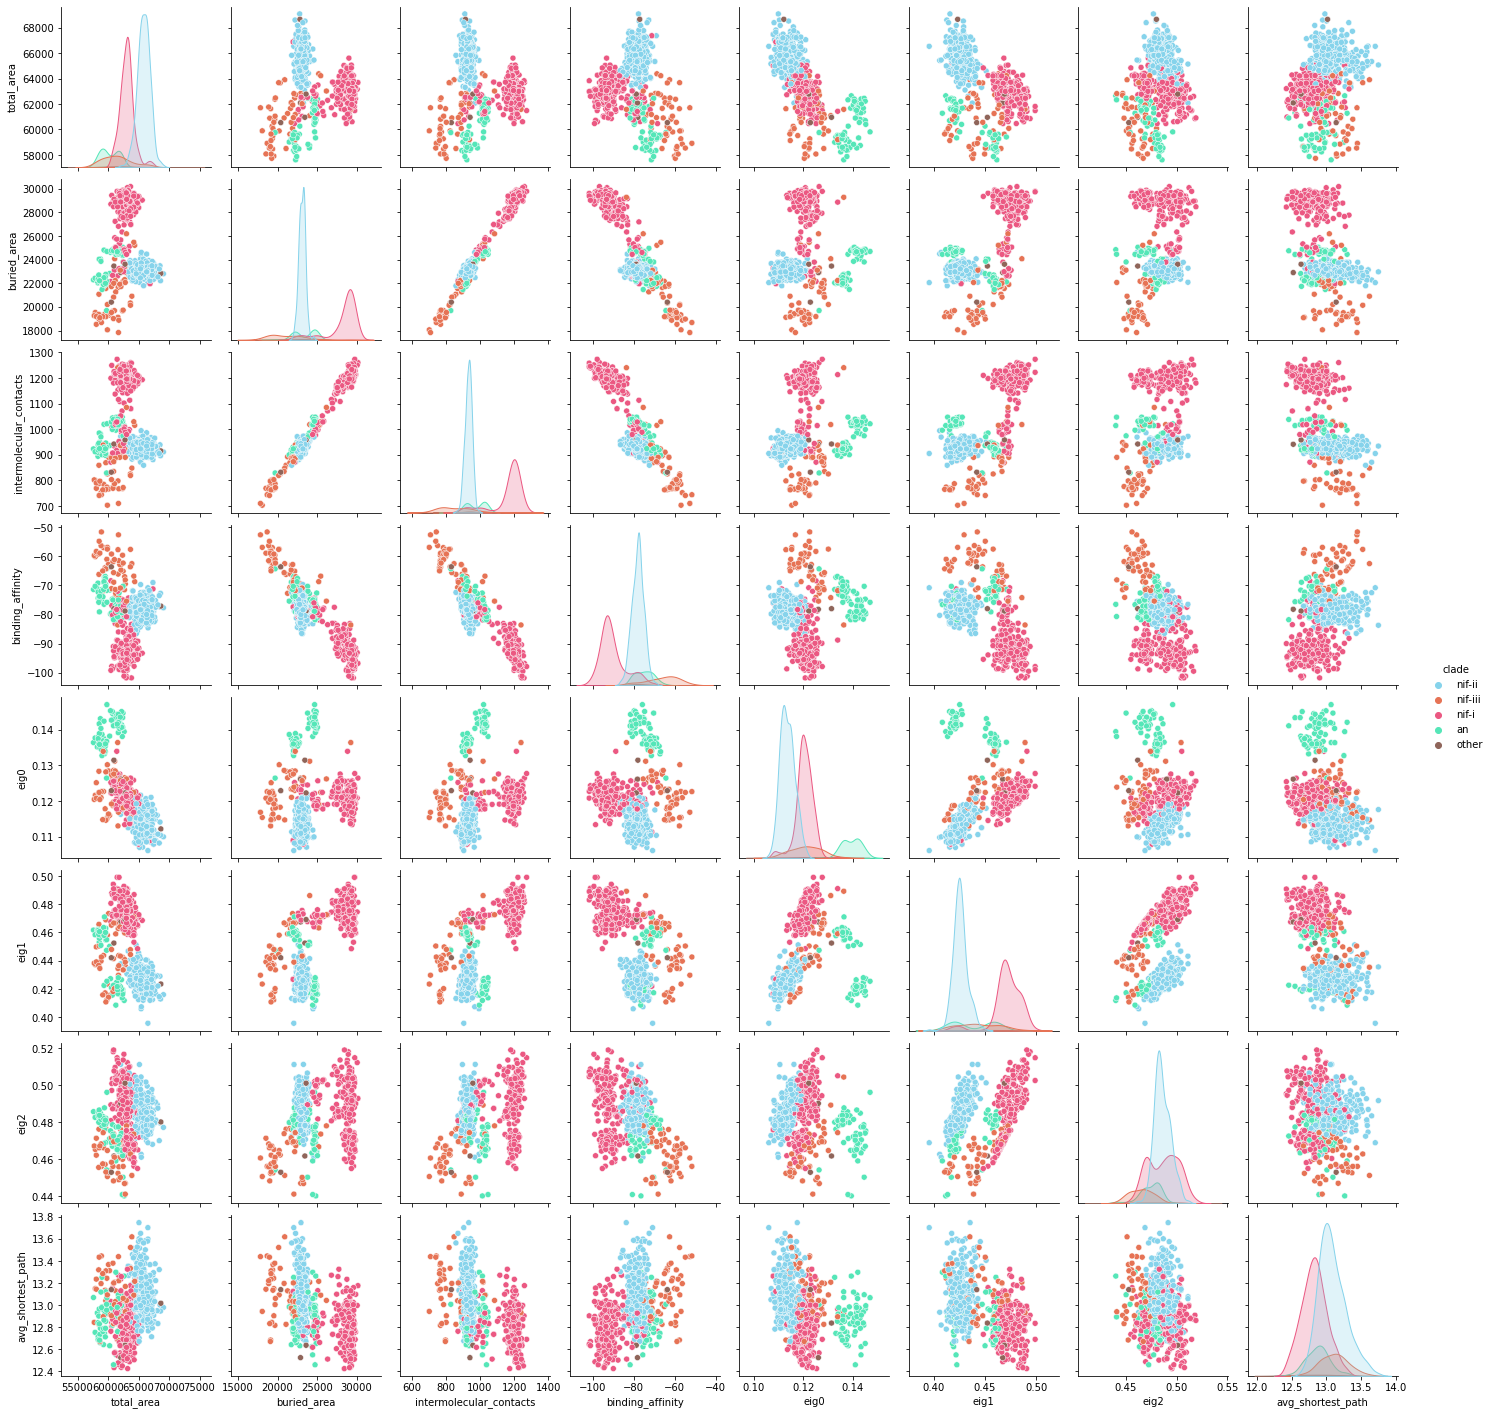

In [8]:
sns.pairplot(
    data=structural_features.query('stochiometry == "DDKK"').query('status == "gold"')[
        ['clade', 'total_area', 'buried_area', 'intermolecular_contacts', 
         'binding_affinity', 'eig0', 'eig1', 'eig2', 'avg_shortest_path']
    ], hue='clade', palette=palette
)

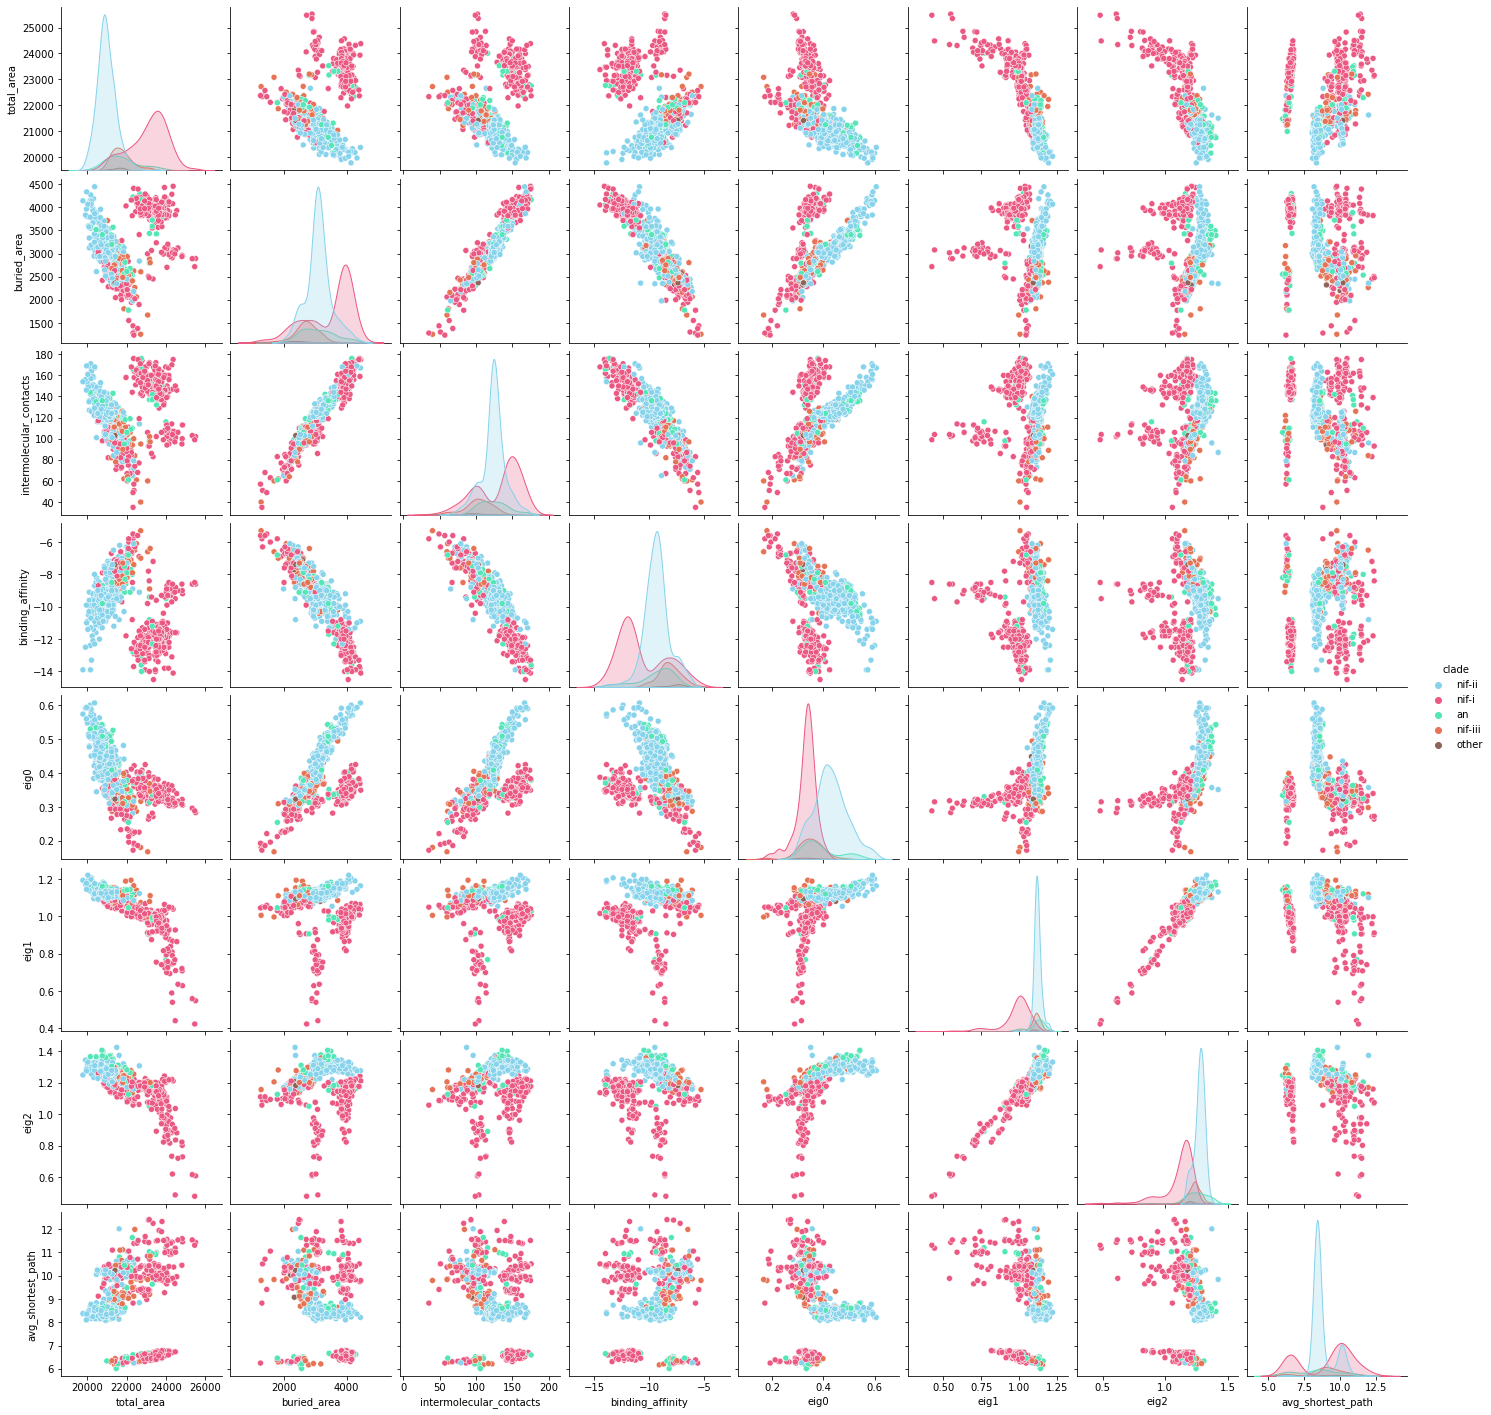

In [35]:
sns.pairplot(
    data=structural_features.query('stochiometry == "HH"')[
        ['clade', 'total_area', 'buried_area', 'intermolecular_contacts', 
         'binding_affinity', 'eig0', 'eig1', 'eig2', 'avg_shortest_path']
    ], 
    hue='clade', palette=palette
)

In [37]:
structural_features.columns

Index(['original_name', 'id', 'stochiometry', 'average_pLDDT', 'taxond_id',
       'lineage', 'scientific_name', 'is_ancestral', 'nitrogenase_type',
       'status', 'chain_reference', 'variant', 'clade', 'total_area',
       'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree'],
      dtype='object')

In [61]:
Z = structural_features.query('stochiometry == "DDKK"')[
    ['buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
]
Z = (Z - Z.mean()) / Z.std()
colors_rows = [palette[x] for x in structural_features.query('stochiometry == "DDKK"').clade.to_list()]

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


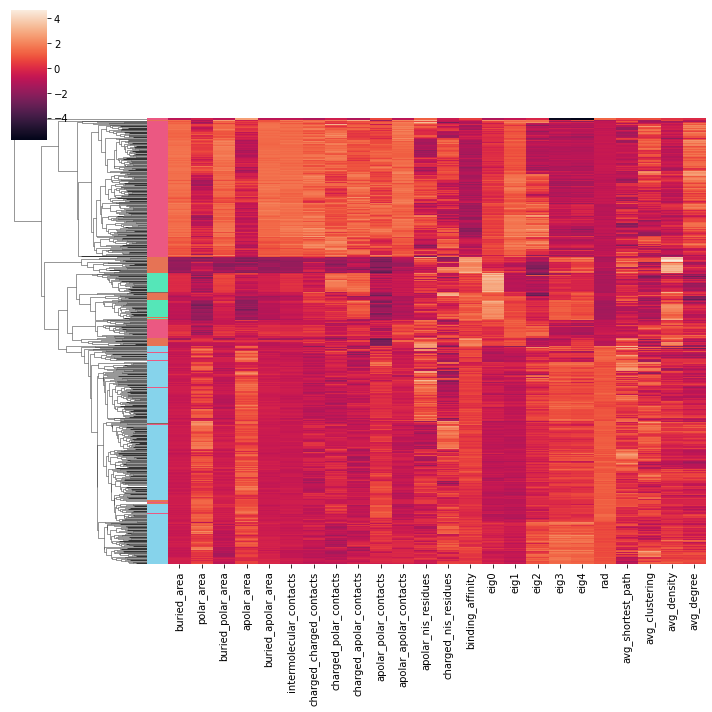

In [62]:
g = sns.clustermap(data=Z, xticklabels=True, yticklabels=False, col_cluster=False, row_colors=colors_rows)
g.savefig('../figures/ddkk-clustermap-structure-features.png', dpi=300)
g.savefig('../figures/ddkk-clustermap-structure-features.svg')

In [47]:
W = structural_features.query('stochiometry == "DDKK"')[
    ['clade', 'id', 'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
]
data_columns = ['buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
W[data_columns] = (W[data_columns] - W[data_columns].mean()) / W[data_columns].std()


W = W.melt(id_vars=['clade', 'id'], value_vars=data_columns)
W

,clade,id,variable,value
0,nif-ii,nsdb-000001,buried_area,-0.392697
1,nif-ii,nsdb-000002,buried_area,-0.536338
2,nif-iii,nsdb-000003,buried_area,-0.509624
3,nif-ii,nsdb-000004,buried_area,-0.647608
4,nif-i,nsdb-000005,buried_area,1.600122
...,...,...,...,...
18451,nif-i,nsdb-000765,avg_degree,0.877682
18452,nif-iii,nsdb-000766,avg_degree,-0.267161
18453,nif-i,nsdb-000767,avg_degree,-0.443010
18454,nif-ii,nsdb-000768,avg_degree,-0.670961


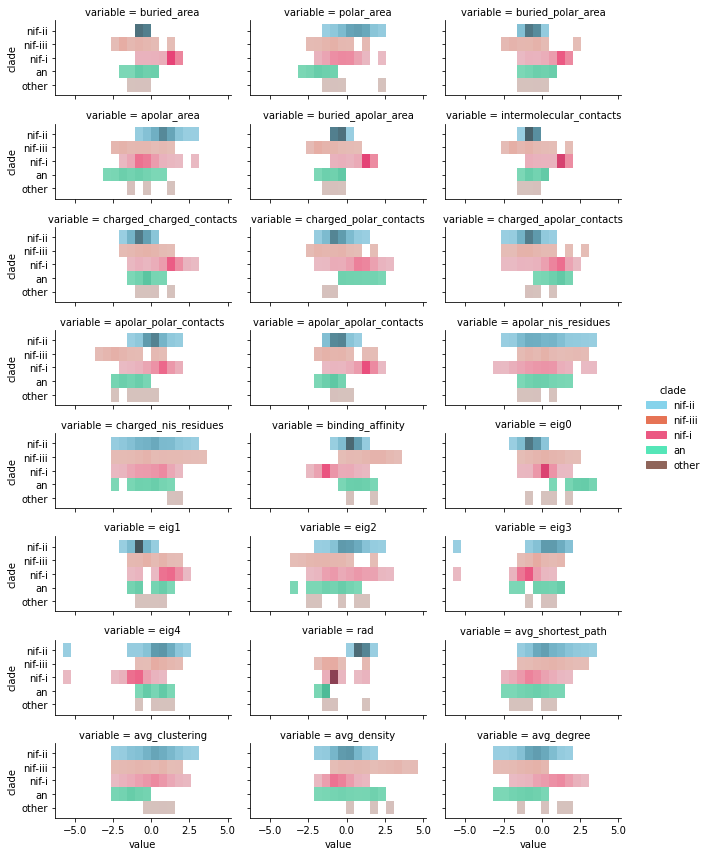

In [63]:
g = sns.displot(x='value', col='variable', y='clade', data=W, height=1.5, col_wrap=3, aspect=2.0, palette=palette, hue='clade', bins=20)
g.savefig('../figures/ddkk-histogram-structure-features.png', dpi=300)
g.savefig('../figures/ddkk-histogram-structure-features.svg')

In [64]:
Z = structural_features.query('stochiometry == "HH"')[
    ['buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
]
Z = (Z - Z.mean()) / Z.std()
colors_rows = [palette[x] for x in structural_features.query('stochiometry == "HH"').clade.to_list()]

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


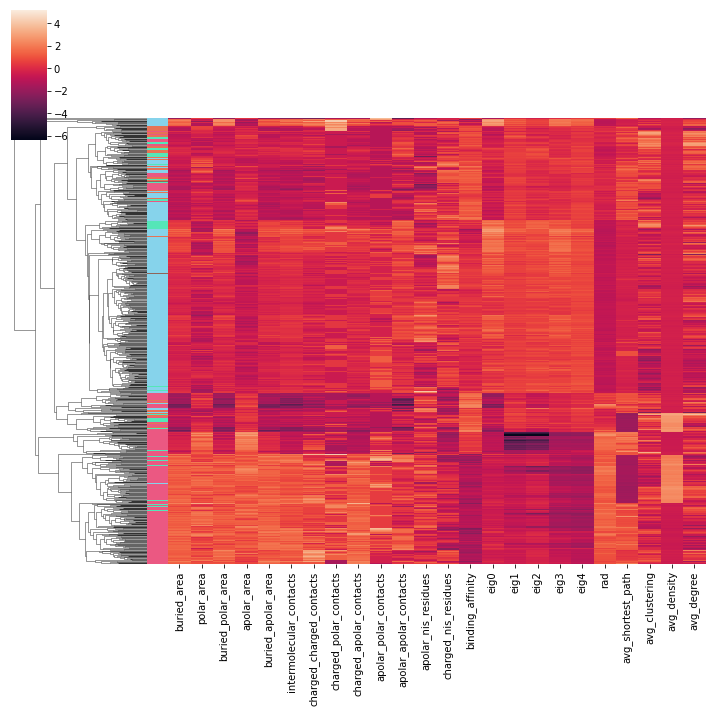

In [65]:
g = sns.clustermap(data=Z, xticklabels=True, yticklabels=False, col_cluster=False, row_colors=colors_rows)
g.savefig('../figures/hh-clustermap-structure-features.png', dpi=300)
g.savefig('../figures/hh-clustermap-structure-features.svg')

In [66]:
W = structural_features.query('stochiometry == "HH"')[
    ['clade', 'id', 'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
]
data_columns = ['buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree']
W[data_columns] = (W[data_columns] - W[data_columns].mean()) / W[data_columns].std()


W = W.melt(id_vars=['clade', 'id'], value_vars=data_columns)
W

,clade,id,variable,value
0,nif-ii,nsdb-000770,buried_area,0.174598
1,nif-ii,nsdb-000771,buried_area,-0.257590
2,nif-ii,nsdb-000772,buried_area,0.306816
3,nif-i,nsdb-000773,buried_area,-1.141041
4,nif-i,nsdb-000774,buried_area,1.694214
...,...,...,...,...
18451,nif-ii,nsdb-001534,avg_degree,-0.041141
18452,nif-i,nsdb-001535,avg_degree,-0.669200
18453,nif-i,nsdb-001536,avg_degree,1.370382
18454,nif-i,nsdb-001537,avg_degree,-0.006151


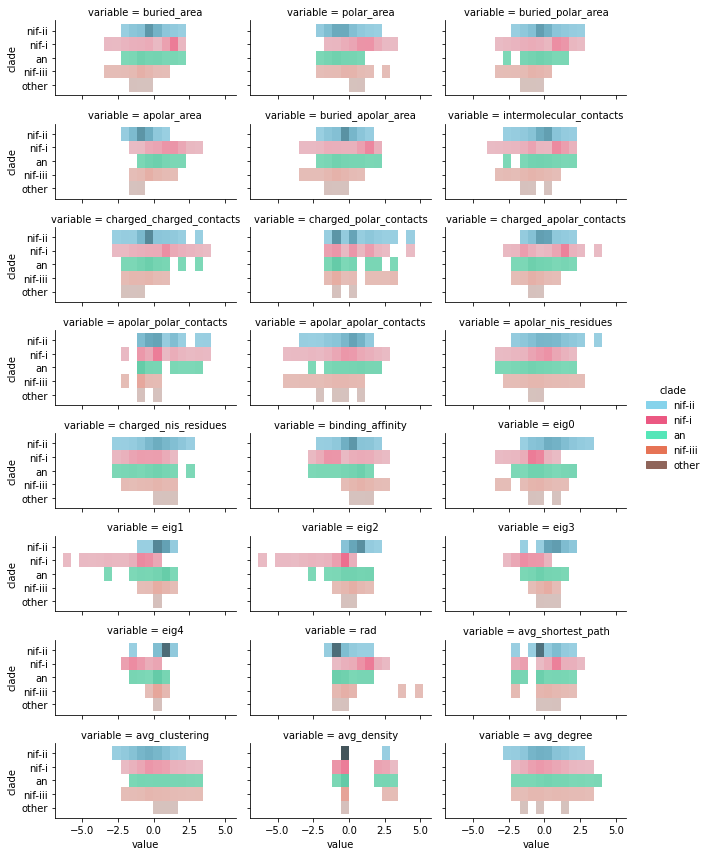

In [67]:
g = sns.displot(x='value', col='variable', y='clade', data=W, height=1.5, col_wrap=3, aspect=2.0, palette=palette, hue='clade', bins=20)
g.savefig('../figures/hh-histogram-structure-features.png', dpi=300)
g.savefig('../figures/hh-histogram-structure-features.svg')

## Statistics

In [103]:
structural_features.query('stochiometry == "DDKK"').query('status == "gold"').columns

Index(['original_name', 'id', 'stochiometry', 'average_pLDDT', 'taxond_id',
       'lineage', 'scientific_name', 'is_ancestral', 'nitrogenase_type',
       'status', 'chain_reference', 'variant', 'clade', 'total_area',
       'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
       'buried_apolar_area', 'intermolecular_contacts',
       'charged_charged_contacts', 'charged_polar_contacts',
       'charged_apolar_contacts', 'apolar_polar_contacts',
       'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
       'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
       'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree'],
      dtype='object')

In [104]:
structural_features.query('stochiometry == "DDKK"').query('status == "gold"')

,original_name,id,stochiometry,average_pLDDT,taxond_id,lineage,scientific_name,is_ancestral,nitrogenase_type,status,...,eig0,eig1,eig2,eig3,eig4,rad,avg_shortest_path,avg_clustering,avg_density,avg_degree
0,Nif_Alkaliflexus_imshenetskii,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,gold,...,0.111507,0.423679,0.484724,0.768013,0.820079,39.041708,13.061203,0.090567,0.001938,3.580087
1,Nif_Desulfohalovibrio_alkalitolerans,nsdb-000002,DDKK,94.695321,NaN,NaN,Desulfohalovibrio alkalitolerans,False,Nif,gold,...,0.110630,0.426989,0.483329,0.735192,0.772095,39.125099,13.222075,0.084049,0.001946,3.548246
2,Nif_Candidatus_Methanolliviera_sp_GoM_asphalt,nsdb-000003,DDKK,94.605453,NaN,NaN,Candidatus Methanolliviera sp GoM asphalt,False,Nif,gold,...,0.111679,0.421556,0.482015,0.734938,0.790079,39.128076,13.141999,0.098442,0.001983,3.635967
3,Nif_Marinilabilia_sp_WTE,nsdb-000004,DDKK,94.377139,NaN,NaN,Marinilabilia sp WTE,False,Nif,gold,...,0.112347,0.424485,0.479764,0.761485,0.819609,38.916532,13.232111,0.093139,0.002011,3.623960
4,Nif_Cupriavidus_sp_amp6,nsdb-000005,DDKK,94.706025,NaN,NaN,Cupriavidus sp amp6,False,Nif,gold,...,0.122517,0.477795,0.489281,0.712044,0.768152,37.680543,13.005990,0.092059,0.001983,3.744974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Anc_1281,nsdb-000765,DDKK,95.550159,Anc_1281_map,Anc_1281_map,Anc_1281_map,True,Anc,gold,...,0.118624,0.475318,0.484337,0.680130,0.720187,37.776623,12.886375,0.095370,0.001945,3.697161
765,Anc_809,nsdb-000766,DDKK,94.279097,Anc_809_map,Anc_809_map,Anc_809_map,True,Anc,gold,...,0.119211,0.447962,0.458295,0.756620,0.856552,37.461440,12.902486,0.097025,0.002138,3.632941
766,Anc_1218,nsdb-000767,DDKK,95.390438,Anc_1218_map,Anc_1218_map,Anc_1218_map,True,Anc,gold,...,0.117807,0.472263,0.502762,0.681715,0.714984,37.980792,12.926200,0.087014,0.001992,3.623077
767,Anc_1386,nsdb-000768,DDKK,94.494796,Anc_1386_map,Anc_1386_map,Anc_1386_map,True,Anc,gold,...,0.112901,0.420807,0.485384,0.725263,0.786553,39.130910,13.190597,0.103407,0.001977,3.610290


In [105]:
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.formula.api import ols

In [113]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x
    except:
        return x

distances_from_root = pd.read_csv('../data/tree/AGNifAlign103.asr.dist821.csv').rename(columns={'node': 'id'})
distances_from_root['id'] = distances_from_root['id'].apply(place_anc_tag)
distances_from_root

,id,dist_from_821
0,Anc_771,1.829611
1,Anc_772,1.795645
2,Anc_781,1.776833
3,Anc_783,1.756560
4,Anc_784,1.709936
...,...,...
1533,Anf_Dickeya_paradisiaca,2.029534
1534,Anf_Rahnella_sp_AA,2.062973
1535,Anf_Thiorhodococcus_drewsii,2.017386
1536,Anf_Geobacter_thiogenes,1.970585


In [114]:
structural_features = pd.merge(
    left=structural_features.query('stochiometry == "DDKK"').query('status == "gold"'), 
    right=distances_from_root.rename(columns={"id": "original_name"}), on='original_name'
)

In [154]:
variables = ['total_area',
    'buried_area', 'polar_area', 'buried_polar_area', 'apolar_area',
    'buried_apolar_area', 'intermolecular_contacts',
    'charged_charged_contacts', 'charged_polar_contacts',
    'charged_apolar_contacts', 'apolar_polar_contacts',
    'apolar_apolar_contacts', 'apolar_nis_residues', 'charged_nis_residues',
    'binding_affinity', 'eig0', 'eig1', 'eig2', 'eig3', 'eig4', 'rad',
    'avg_shortest_path', 'avg_clustering', 'avg_density', 'avg_degree',
]

for v in variables:
    structural_features[v] = (structural_features[v] - structural_features[v].mean()) / structural_features[v].std()

In [199]:
statistics = []
for v in variables:
    y, X = dmatrices('{:s} ~ clade'.format(v), data=structural_features, return_type='dataframe')
    mod = sm.OLS(y, X)
    res = mod.fit()
    statistics.append(dict(pvalue=res.f_pvalue, factor='clade', variable=v))

    y, X = dmatrices('{:s} ~ dist_from_821'.format(v), data=structural_features, return_type='dataframe')
    mod = sm.OLS(y, X)
    res = mod.fit()
    statistics.append(dict(pvalue=res.f_pvalue, factor='age', variable=v, coeff=res.params['dist_from_821'], correlation=res.rsquared))

In [200]:
statistics_coefff = pd.DataFrame.from_records(statistics).pivot(index='variable', columns='factor', values='coeff')
statistics_rsquared = pd.DataFrame.from_records(statistics).pivot(index='variable', columns='factor', values='correlation')
statistics = pd.DataFrame.from_records(statistics).pivot(index='variable', columns='factor', values='pvalue')

In [158]:
statistics

factor,age,clade
variable,,
apolar_apolar_contacts,1.164510e-12,9.884984e-220
apolar_area,3.230888e-01,2.400487e-134
apolar_nis_residues,9.697375e-01,1.768880e-02
apolar_polar_contacts,2.408745e-13,1.212257e-148
avg_clustering,7.617818e-07,3.794058e-33
avg_degree,5.405137e-02,3.520644e-89
avg_density,1.057052e-39,3.937958e-86
avg_shortest_path,1.405525e-05,1.127767e-61
binding_affinity,9.417547e-27,3.035320e-192


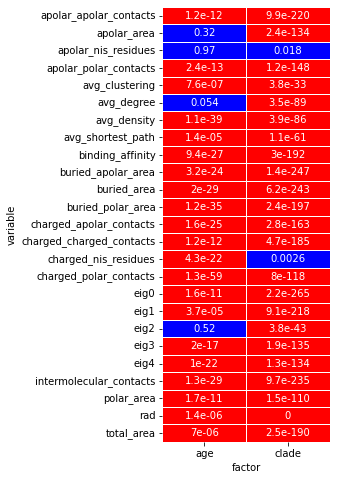

In [180]:
fig, ax = plt.subplots(1)
fig.set_size_inches(3, 8)
g = sns.heatmap(data=statistics, vmax=0.001, vmin=0.00099, cmap='bwr_r', linecolor='white', linewidths=1.0, ax=ax, cbar=None, annot=True)
# fig.tight_layout()
fig.savefig('../figures/ddkk-table-ANOVA.svg')
fig.savefig('../figures/ddkk-table-ANOVA.png', dpi=300)

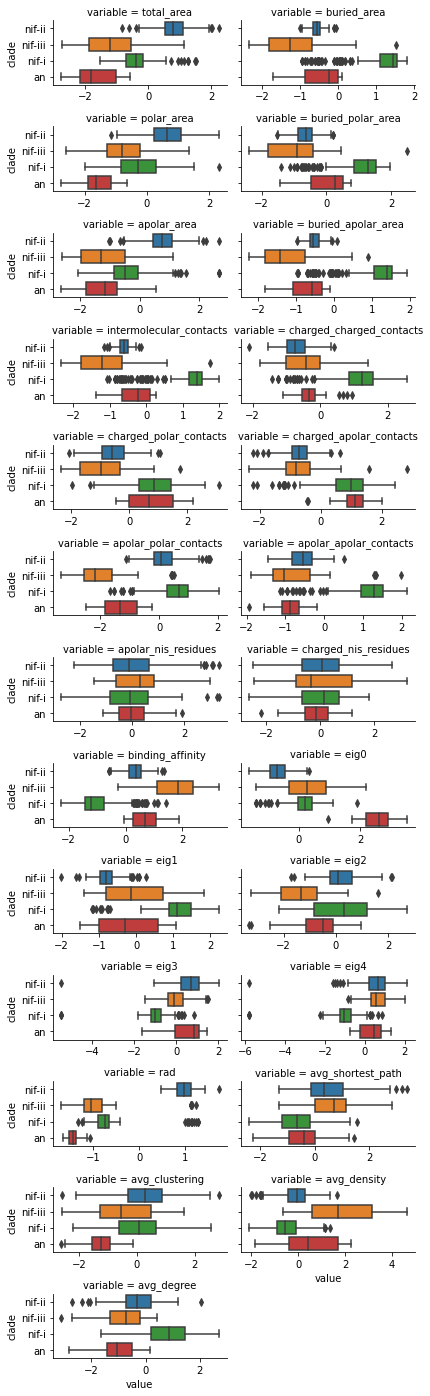

In [181]:
g = sns.catplot(
    data=structural_features.melt(id_vars=['dist_from_821', 'clade', 'is_ancestral'], value_vars=variables).query('clade != "other"'),
    x='value', y='clade', col='variable', col_wrap=2, sharex=False, kind='box', height=1.5, aspect=2.0
)
g.savefig('../figures/ddkk-boxplot-features-clade.svg')
g.savefig('../figures/ddkk-boxplot-features-clade.png', dpi=300)

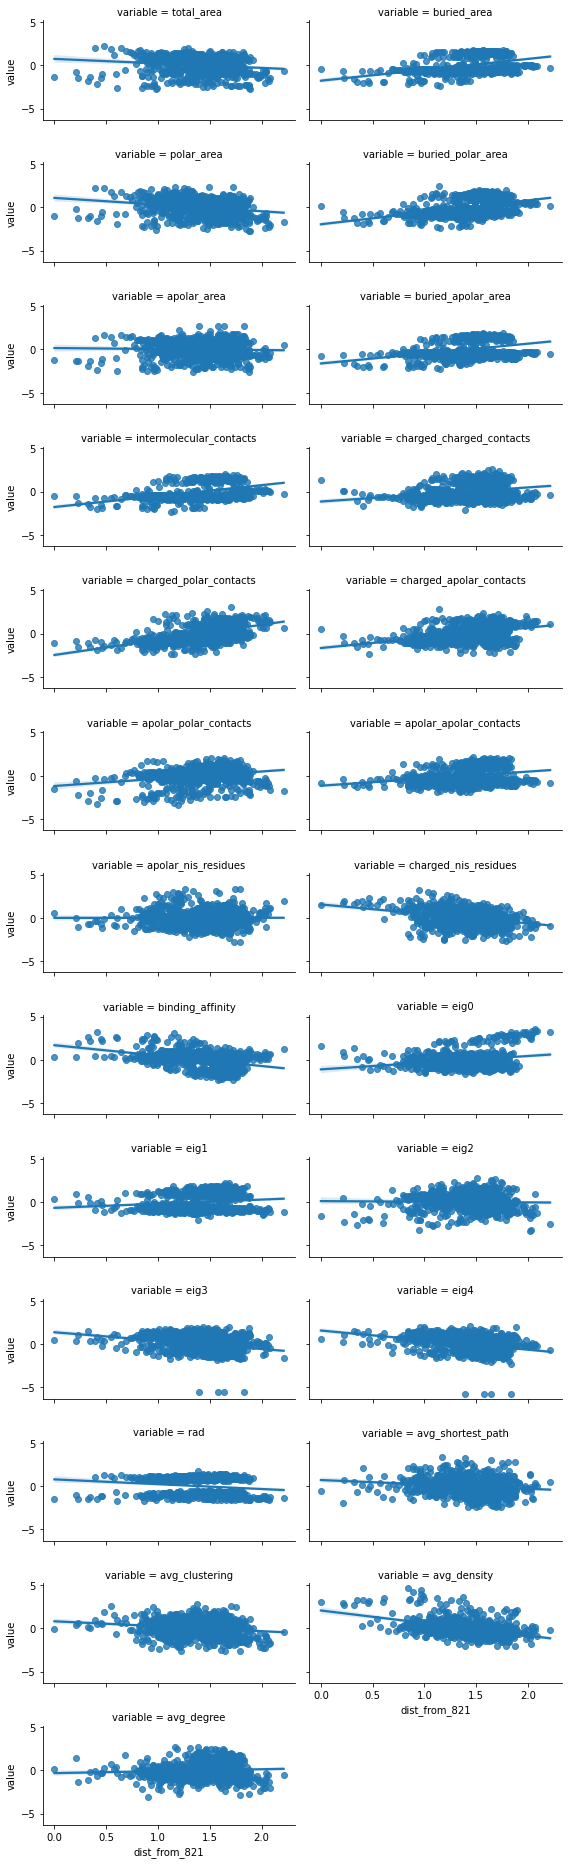

In [182]:
g = sns.lmplot(
    data=structural_features.melt(id_vars=['dist_from_821', 'clade', 'is_ancestral'], value_vars=variables),
    x='dist_from_821', y='value', col='variable', col_wrap=2, height=2.0, aspect=2.0, 
)
g.savefig('../figures/ddkk-relplot-features-age.svg')
g.savefig('../figures/ddkk-relplot-features-age.png', dpi=300)

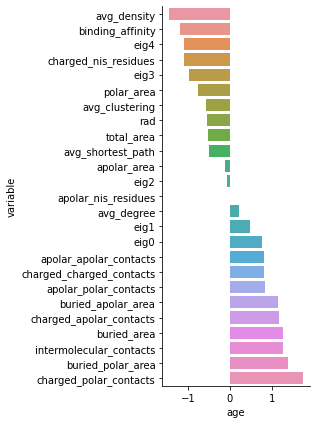

In [213]:
sns.catplot(y='variable', x='age', data=statistics_coefff.reset_index().sort_values(by='age', ascending=True), height=6.0, aspect=0.75, kind='bar')

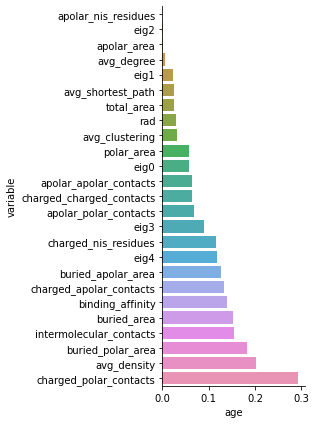

In [210]:
sns.catplot(y='variable', x='age', data=statistics_rsquared.reset_index().sort_values(by='age', ascending=True), height=6.0, aspect=0.75, kind='bar')